In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("D:\HopeAI\ML-Week3\Assignments\All_AlgorithmExercise\insurance_pre.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [5]:
dataset = pd.get_dummies(dataset, drop_first=True,dtype=int)

In [6]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [7]:
independent = dataset[['age', 'sex_male', 'bmi', 'children', 'smoker_yes']]

In [8]:
dependent = dataset[['charges']]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt', splitter='random')
regressor.fit(x_train,y_train)

,criterion,'friedman_mse'
,splitter,'random'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.6959943523847405, 0.9761904761904762, 'x[4] <= 0.85\nfriedman_mse = 140986233.214\nsamples = 936\nvalue = 13232.916'),
 Text(0.49631891187099336, 0.9285714285714286, 'x[3] <= 1.253\nfriedman_mse = 37737689.841\nsamples = 746\nvalue = 8616.732'),
 Text(0.596156632127867, 0.9523809523809523, 'True  '),
 Text(0.34673925252458454, 0.8809523809523809, 'x[1] <= 0.101\nfriedman_mse = 35244856.432\nsamples = 509\nvalue = 7957.813'),
 Text(0.20407755414825418, 0.8333333333333334, 'x[0] <= 54.831\nfriedman_mse = 35427016.523\nsamples = 270\nvalue = 7989.166'),
 Text(0.1097095366278708, 0.7857142857142857, 'x[3] <= 0.479\nfriedman_mse = 29917927.845\nsamples = 217\nvalue = 6628.158'),
 Text(0.03542781788759569, 0.7380952380952381, 'x[2] <= 23.341\nfriedman_mse = 26226978.571\nsamples = 125\nvalue = 5628.73'),
 Text(0.008464554677288853, 0.6904761904761905, 'x[0] <= 40.228\nfriedman_mse = 44967827.521\nsamples = 11\nvalue = 5874.07'),
 Text(0.005974979772203896, 0.6428571428571429, 'x[0] <

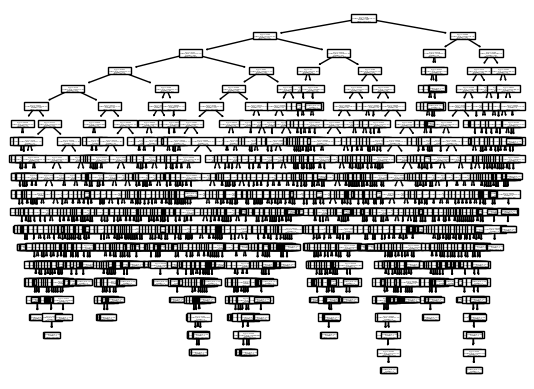

In [12]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)

In [14]:
y_pred = regressor.predict(x_test)

In [15]:
print("Predict: ",y_pred)

Predict:  [10436.096     8930.93455  44202.6536   21797.0004    9264.797
 21984.47061   1615.7667   10848.1343    6184.2994    5253.524
  5693.4305    9715.841     7050.642     4571.41305  18246.4955
  9715.841    13129.60345   3292.52985   6338.0756   33907.548
 43813.8661   12646.207     9625.92     24393.6224   19673.33573
  3875.7341    2527.81865   8538.28845   3757.8448    7256.7231
  6184.2994   58571.07448  12981.3457    9144.565    20167.33603
 13126.67745   8978.1851   38282.7495   24535.69855   1880.07
  2527.81865   2866.091    37829.7242   47269.854    37133.8982
  2801.2588    9715.841     7742.1098    4719.52405  12032.326
  2020.5523    3056.3881   38245.59327  46661.4424   11093.6229
  1532.4697    1532.4697    8835.26495  10096.97     12913.9924
  1252.407    46130.5265   15161.5344    6986.697    12949.1554
  9877.6077   33907.548    43753.33705   2913.569    12949.1554
 12638.195    11945.1327   16297.846    13887.204    12629.8967
 12638.195     8688.85885   7256.7

In [16]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test,y_pred)

In [17]:
r_score

0.6890885364226357